<a href="https://colab.research.google.com/github/sanmoy1985/CoronalHolesContour/blob/master/Photo_effects_combo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

import torch
from torchvision.models.segmentation import deeplabv3_resnet101
from torchvision import transforms

from PIL import Image, ImageDraw, ImageFilter
import sys
import numpy
import glob
import IPython.display as display

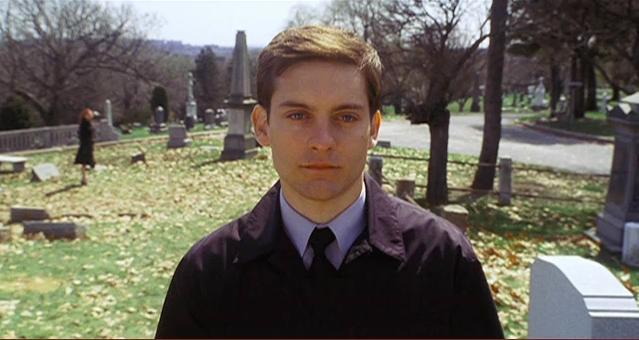

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Signimus/159_0078.jpg')
cv2_imshow(img)

In [ ]:
def make_deeplab(device):
    deeplab = deeplabv3_resnet101(pretrained=True).to(device)
    deeplab.eval()
    return deeplab

In [ ]:
device = torch.device("cpu")
deeplab = make_deeplab(device)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


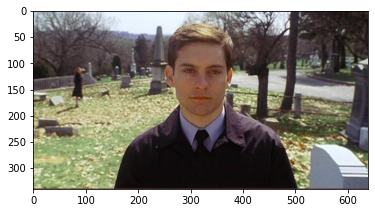

In [ ]:
plt.imshow(img[:, :, ::-1])
plt.show()

In [ ]:
deeplab_preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.685, 0.456, 0.706], std=[0.229, 0.224, 0.225]),
])

In [ ]:
def apply_deeplab(deeplab, img, device):
    input_tensor = deeplab_preprocess(img)
    input_batch = input_tensor.unsqueeze(0)
    with torch.no_grad():
        output = deeplab(input_batch.to(device))['out'][0]
    output_predictions = output.argmax(0).cpu().numpy()
    return (output_predictions == 15)

In [ ]:
mask = apply_deeplab(deeplab, img, device)

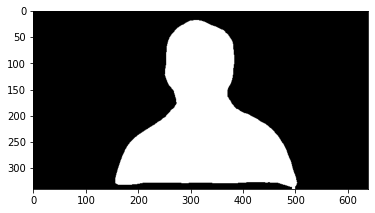

In [ ]:
plt.imshow(mask, cmap="gray")
plt.show()

In [ ]:
def processImage(infile):
    try:
        im = Image.open(infile)
    except IOError:
      print ("Cant load", infile)
      sys.exit(1)
    i = 0
    mypalette = im.getpalette()

    try:
        while 1:
            im.putpalette(mypalette)
            new_im = Image.new("RGBA", im.size)
            new_im.paste(im)
            new_im.save('/content/drive/MyDrive/Signimus/frame/foo'+str(i)+'.png')

            i += 1
            im.seek(im.tell() + 1)

    except EOFError:
        pass # end of sequence

In [ ]:
processImage('/content/drive/MyDrive/Signimus/back.gif')

In [ ]:
im = Image.open('/content/drive/MyDrive/Signimus/frame/foo0.png')
rgb_im = im.convert('RGB')
rgb_im.save('/content/drive/MyDrive/Signimus/frame/foo0.jpg')

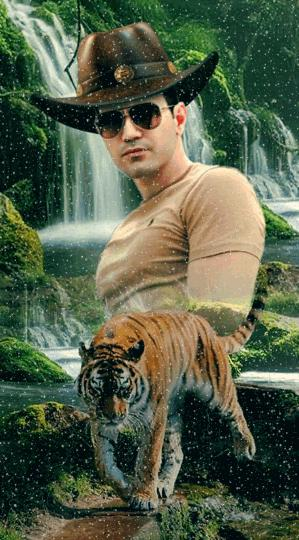

In [ ]:
img1 = cv2.imread('/content/drive/MyDrive/Signimus/frame/foo0.jpg')
cv2_imshow(img1)

In [ ]:
mask1 = mask.astype('uint8')*255


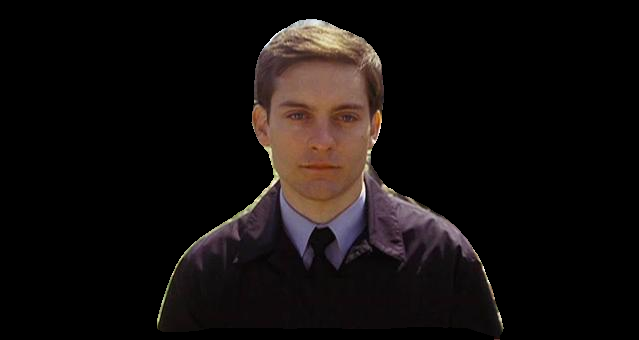

In [ ]:
maskt=cv2.bitwise_and(img, img, mask = mask1)
cv2_imshow(maskt)

In [ ]:
#im.crop((left, top, right, bottom))
headbox = (160,50,500,400)

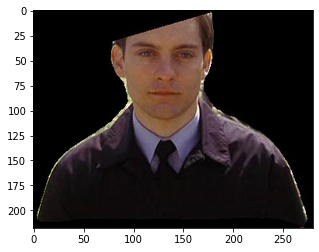

In [ ]:
maskt = cv2.cvtColor(maskt, cv2.COLOR_BGR2RGB) # add this one to peserve color
data = Image.fromarray(maskt.astype('uint8'), 'RGB')

#data.crop(headbox).save("/content/drive/MyDrive/Signimus/head.jpg")



height = maskt.shape[0]
width = maskt.shape[1]

mask2 = numpy.zeros((height, width), dtype=numpy.uint8)
points = numpy.array([[[210,150],[152,340],[510,340],[420,100],[390,60],[220,110]]])
cv2.fillPoly(mask2, points, (255))

res = cv2.bitwise_and(maskt,maskt,mask = mask2)
#res = cv2.bitwise_and(img,img,mask = mask2)


rect = cv2.boundingRect(points) # returns (x,y,w,h) of the rect
cropped = res[rect[1]: rect[1] + rect[3], rect[0]: rect[0] + rect[2]]



cv2.imwrite("/content/drive/MyDrive/Signimus/head.jpg", cropped)
head_crop = Image.open(r"/content/drive/MyDrive/Signimus/head.jpg")

basewidth = 280
wpercent = (basewidth/float(head_crop.size[0]))
hsize = int((float(head_crop.size[1])*float(wpercent)))
#newsize = (100, 150)
head_crop = head_crop.resize((basewidth,hsize), Image.ANTIALIAS)
plt.imshow(head_crop)

In [ ]:
mask1 = Image.fromarray(mask)

data.crop(headbox).save("/content/drive/MyDrive/Signimus/head.jpg")
mask1.save('/content/drive/MyDrive/Signimus/mask.png')

299
540
300
299
Ratio before conversion: 0.9966666666666667


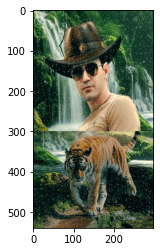

In [ ]:
ii = Image.open("/content/drive/MyDrive/Signimus/frame/foo0.jpg")
img_w, img_h = ii.size
#print(img_w)
#print(img_h)
io = Image.new("RGB", ii.size,"white")
#im.crop((left, top, right, bottom))
box = (0, 300, 299, 540)
region = ii.crop(box)
#io = Image.open("template.png")
io.paste(region, box)
#io.save("output.png")


box = (0, 0, 299, 300)
region1 = ii.crop(box)
# Getting height and width of the image
height_r = region1.size[1]
width_r = region1.size[0]
#print(height_r)
#print(width_r)
  
# Printing ratio before conversion
print('Ratio before conversion:', width_r/height_r)
  
# Changing the height and width of the image
width_r = width_r
height_r = height_r + 80
  
# Resizing the image
region1 = region1.resize((width_r ,height_r), Image.ANTIALIAS)
box = (0, 0, 299, 300)
region1 = region1.crop(box)
io.paste(region1, box)

plt.imshow(io)

In [ ]:
im2 = Image.open('/content/drive/MyDrive/Signimus/159_0078.jpg')
#mask_im = Image.new('L', im2.size, 0)
#draw = ImageDraw.Draw(mask_im)

im1= Image.open('/content/drive/MyDrive/Signimus/frame/foo0.jpg')

#mask_im = Image.open('/content/drive/MyDrive/Signimus/mask.png').resize(im2.size).convert('L')
#mask_im = mask_im.resize((basewidth,hsize), Image.ANTIALIAS)

mask_img = cv2.imread('/content/drive/MyDrive/Signimus/mask.png')

height_m = mask_img.shape[0]
width_m = mask_img.shape[1]

mask3 = numpy.zeros((height_m, width_m), dtype=numpy.uint8)
points = numpy.array([[[210,150],[152,340],[510,340],[420,100],[390,60],[220,110]]])
cv2.fillPoly(mask3, points, (255))

res = cv2.bitwise_and(mask_img,mask_img,mask = mask3)
#res = cv2.bitwise_and(img,img,mask = mask2)


rect = cv2.boundingRect(points) # returns (x,y,w,h) of the rect
cropped1 = res[rect[1]: rect[1] + rect[3], rect[0]: rect[0] + rect[2]]

cv2.imwrite("/content/drive/MyDrive/Signimus/mask1.jpg", cropped1)


mask_im1=Image.open('/content/drive/MyDrive/Signimus/mask1.jpg')

basewidth = 280
wpercent = (basewidth/float(mask_im1.size[0]))
hsize = int((float(mask_im1.size[1])*float(wpercent)))
#newsize = (100, 150)
mask_im1 = mask_im1.resize((basewidth,hsize), Image.ANTIALIAS)
mask_im_blur = mask_im1.filter(ImageFilter.GaussianBlur(5))
mask_im_blur.save("/content/drive/MyDrive/Signimus/mask2.png", quality=95)


mask_im_blur=Image.open('/content/drive/MyDrive/Signimus/mask2.png').convert("L")
#mask2_im = Image.fromarray(mask2_im)

im1=io
back_im = im1.copy()
back_im.paste(head_crop, (10,100), mask_im_blur)
back_im.save('paste_mask_circle.jpg', quality=95)

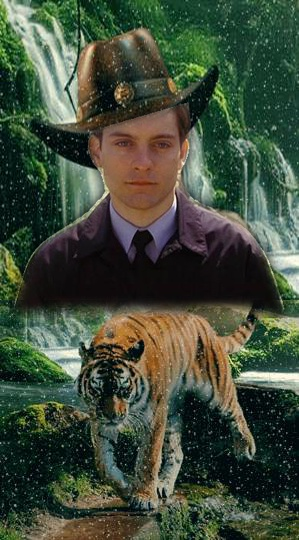

In [ ]:
img2 = cv2.imread('./paste_mask_circle.jpg')
cv2_imshow(img2)

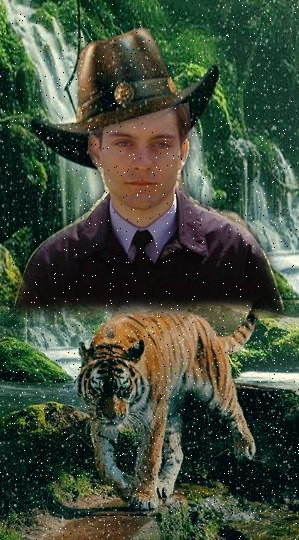

In [ ]:
import numpy as np
import random
import cv2

def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

image = maskt #cv2.imread('image.jpg',0) # Only for grayscale image
noise_img = sp_noise(img2,0.005)
cv2.imwrite('sp_noise.jpg', noise_img)
cv2_imshow(noise_img)


for i in range(0, 7):
  noise_im = sp_noise(img2,0.005)
  cv2.imwrite('/content/drive/MyDrive/Signimus/frame_new/foo'+str(i)+'.png', noise_im)

In [ ]:
def make_gif(frame_folder):
    frames = [Image.open(image) for image in glob.glob(f"{frame_folder}/*.png")]
    frame_one = frames[0]
    frame_one.save("/content/drive/MyDrive/Signimus/REWORKED_PHOTO.gif", format="GIF", append_images=frames,
               save_all=True, duration=100, loop=0)
    
make_gif("/content/drive/MyDrive/Signimus/frame_new")